<a href="https://colab.research.google.com/github/Kashara-Alvin-Ssali/ML-models/blob/main/MobileNetVest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

In [215]:
from google.colab import drive
import zipfile
import os
import shutil

In [216]:
# # Define dataset paths
# drive_path = "/content/drive/My Drive/Dataset.zip"  # Update path if needed
# zip_path = "/content/Dataset.zip"  # Destination in Colab
# extract_path = "/content/Dataset"

In [217]:
from google.colab import drive  # <-- Import drive
drive.mount('/content/drive') # Mount to the default path without spaces

# Now access your dataset using the full path:
train_dir = "/content/drive/MyDrive/Dataset4/Training"
validation_dir = "/content/drive/MyDrive/Dataset4/Validation"
test_dir = "/content/drive/MyDrive/Dataset4/Testing"  # If needed for testing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
# # Define dataset paths
# base_dir = "/content/Dataset/Dataset"  # Adjust based on printed structure
# train_dir = os.path.join(base_dir, "Training")
# val_dir = os.path.join(base_dir, "Validation")
# test_dir = os.path.join(base_dir, "Testing")


In [219]:
# Check class distribution in the training data
import os

def check_class_distribution(data_dir):
  """Checks the number of images in each class directory."""
  for class_name in os.listdir(data_dir):
      class_path = os.path.join(data_dir, class_name)
      if os.path.isdir(class_path):
          num_images = len(os.listdir(class_path))
          print(f"Class '{class_name}': {num_images} images")

print("Training data distribution:")
check_class_distribution(train_dir)
print("\nValidation data distribution:")
check_class_distribution(validation_dir)
print("\nTest data distribution:")
check_class_distribution(test_dir)

Training data distribution:
Class 'Real': 33 images
Class 'Fake': 31 images

Validation data distribution:
Class 'Fake': 8 images
Class 'Real': 9 images

Test data distribution:
Class 'Real': 2 images
Class 'Fake': 2 images


In [220]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
# Verify class indices
print(train_generator.class_indices)

# Make sure class_labels matches the class_indices
class_labels = {0: "Fake", 1: "Real"}  # Ensure this matches train_generator.class_indices
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')


Found 64 images belonging to 2 classes.
{'Fake': 0, 'Real': 1}
Found 17 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [221]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import regularizers # Import regularizers module

# Load MobileNetV2 without the top classification layer
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build new classification layers on top
mobilenet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)), # Use regularizers.l2
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

# Compile model
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
EPOCHS = 10
history = mobilenet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.5000 - loss: 3.2048 - val_accuracy: 0.2941 - val_loss: 3.0287
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6042 - loss: 2.8549 - val_accuracy: 0.3529 - val_loss: 2.9846
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4375 - loss: 2.8783 - val_accuracy: 0.4118 - val_loss: 2.8035
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5729 - loss: 2.7362 - val_accuracy: 0.4118 - val_loss: 2.7029
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5625 - loss: 2.5943 - val_accuracy: 0.4706 - val_loss: 2.6194
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5312 - loss: 2.4766 - val_accuracy: 0.5882 - val_loss: 2.4602
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5729 - loss: 2.3281 - val_accuracy: 0.7059 - val_loss: 2.3338
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7083 - loss: 2.2478 - val_accuracy: 0.7059 - val_loss: 2.2387
Epoch 9/10
2/2

In [222]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(train_generator.classes),
                                                 y=train_generator.classes)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

# ... (code for compiling the model, etc.) ...

# Train the model with class weights
history = mobilenet_model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=EPOCHS,
                              class_weight=class_weight_dict)

{0: 1.032258064516129, 1: 0.9696969696969697}
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6667 - loss: 1.9938 - val_accuracy: 0.4706 - val_loss: 2.0500
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6771 - loss: 1.9002 - val_accuracy: 0.8235 - val_loss: 1.9591
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6875 - loss: 1.9463 - val_accuracy: 0.7059 - val_loss: 1.9032
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6875 - loss: 1.8000 - val_accuracy: 0.7059 - val_loss: 1.8475
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7188 - loss: 1.7011 - val_accuracy: 0.7059 - val_loss: 1.8015
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7917 - loss: 1.6172 - val_accuracy: 0.6471 - val_loss: 1.7662
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7604 - loss: 1.6477 - val_accuracy: 0.7059 - val_loss: 1.7102
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8333 - loss: 1.4645 - val_accura

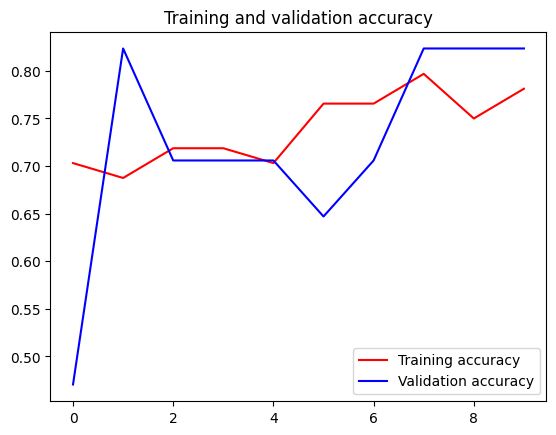

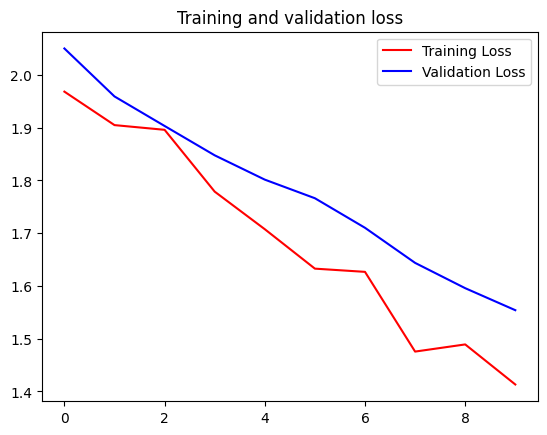

In [223]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [224]:
mobilenet_model.save("/content/drive/My Drive/mobilenet_fake_currency_model.h5")


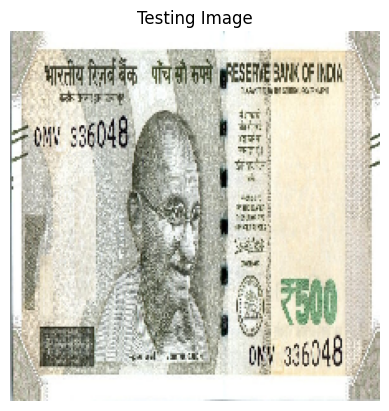

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Fake (Confidence: 43.97%)


In [225]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the image path
img_path = "/content/drive/MyDrive/Dataset4/Testing/Fake/fake1.jpg"  # Ensure the path is correct

# Load the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size

# Convert image to array and normalize
img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Show the image
plt.imshow(img)
plt.axis("off")
plt.title("Testing Image")
plt.show()

# Make prediction
prediction = mobilenet_model.predict(img_array)

# Interpret the result
class_labels = {0: "Fake", 1: "Real"}  # Ensure class mapping matches train_generator.class_indices
predicted_class = "Real" if prediction[0][0] > 0.5 else "Fake"

# Print the result
print(f"Predicted Class: {predicted_class} (Confidence: {prediction[0][0] * 100:.2f}%)")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


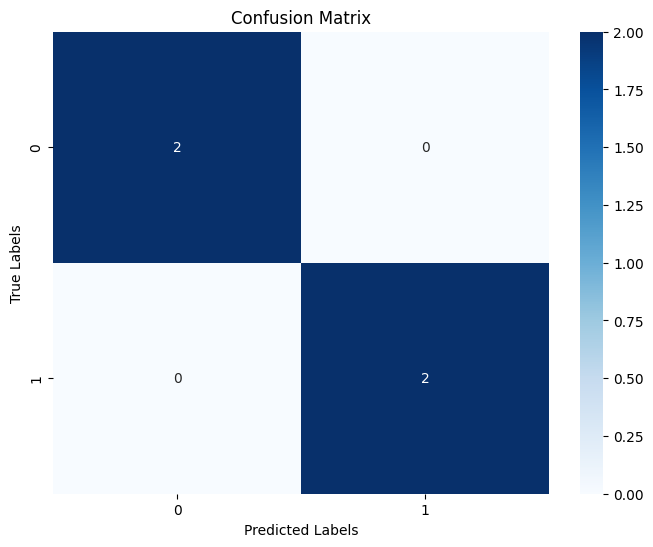

In [226]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have already loaded your model as mobilenet_model and have the test_generator

# Reset the test generator to ensure we get the correct order of predictions
test_generator.reset()

# Make predictions on the test set
predictions = mobilenet_model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Extract true labels from the test generator
true_classes = test_generator.classes

# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
